In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# Fonction affichage image

In [2]:
#Plot images
def plot(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# Fonction Flot Optique

In [3]:
def opticalFlow(prev, curr):
    hsv = np.zeros_like(prev)
    hsv[...,1] = 255
    prev_frame = cv2.cvtColor(prev,cv2.COLOR_BGR2GRAY)
    curr_frame = cv2.cvtColor(curr,cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_frame,curr_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    #Remove the magnitude values close to median ( compensate camera mouvement)
    med_mag = np.median(mag)
    med_ang = np.median(ang)
    for i, array in enumerate(ang):
        for j,x in enumerate(array):
            if (abs(x-med_ang)<=0.20 or abs(mag[i][j]-med_mag)<= 0.20):
                ang[i][j] = 0.0
                mag[i][j]= 0.0
            
            
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    return bgr


# Fonction Superpixels SLIC

In [4]:
def SLIC_Superpixels(image):
    frame = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    SLIC = cv2.ximgproc.createSuperpixelSLIC(frame, cv2.ximgproc.SLIC, 25)
    SLIC.iterate(30)
    SLIC.enforceLabelConnectivity(25)
    return SLIC
    
    

# Fonction Détection Objets

In [5]:
def Object_Detection(SLIC, optical_flow):
    labels = SLIC.getLabels()
    flow = cv2.cvtColor(optical_flow, cv2.COLOR_BGR2GRAY)
    countLabels = [0] * SLIC.getNumberOfSuperpixels()
    countFlowLabels = [0] * SLIC.getNumberOfSuperpixels()
    
    for i, arrays in enumerate(labels):
        for j,x in enumerate(arrays):
            countLabels[arrays[j]]+=1
            if (flow[i][j] > 0):
                countFlowLabels[arrays[j]]+=1
    
    
    res = np.zeros_like(flow)
    for i, arrays in enumerate(labels):
        for j,x in enumerate(arrays):
            if ((countFlowLabels[arrays[j]]/countLabels[arrays[j]])>0.7):
                res[i][j] = 255
    
    return res            
    
    
    

# Main

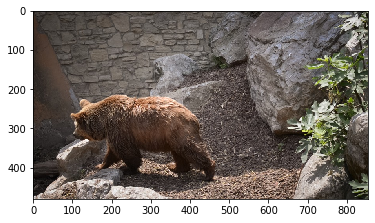

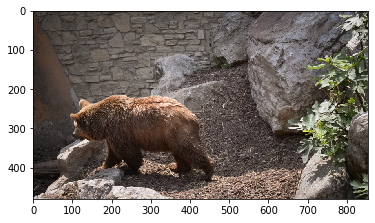

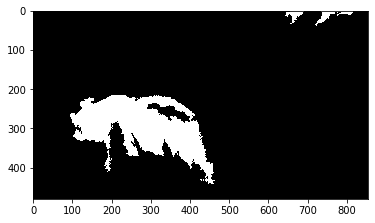

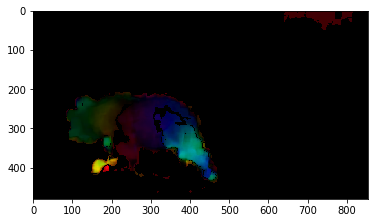

In [7]:
image = cv2.imread('bear/00000.jpg')
image2 = cv2.imread('bear/00001.jpg')

plot(image)
plot(image2)


optical_flow = opticalFlow(image, image2)
SLIC = SLIC_Superpixels(image2)

res = Object_Detection(SLIC, optical_flow)

plot (res)


plot(optical_flow)